# Task
Perform detailed exploratory data analysis on the "annex1.csv" dataset to uncover meaningful business insights using visualizations and statistical summaries. Apply industry-standard EDA techniques to understand variable distributions, correlations, and detect anomalies or hidden patterns. Use `.info()`, `.describe()`, `.value_counts()`, and `.isnull().sum()` to understand the structure. Visualize missing data using `sns.heatmap()`. Use `histplot`, `boxplot`, `pairplot`, and `countplot` for distribution and category analysis. Create correlation heatmaps to check variable relationships. Perform grouping using `.groupby()` and aggregation to find category-level patterns. Analyze outliers and skewness using `.skew()` and log transforms if needed.

## Load the dataset

### Subtask:
Load the `annex1.csv` dataset into a pandas DataFrame.


**Reasoning**:
Import pandas and load the dataset into a DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv('annex1.csv')

**Reasoning**:
Display the first few rows of the DataFrame to verify the data loading.



In [2]:
df.head()

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables


## Understand the data structure

### Subtask:
Use `.info()`, `.describe()`, `.value_counts()`, and `.isnull().sum()` to get a comprehensive understanding of the dataset's structure, variable types, summary statistics, value distributions, and missing data.


**Reasoning**:
Perform basic data exploration using `.info()`, `.describe()`, `.value_counts()`, and `.isnull().sum()` as instructed.



In [3]:
df.info()
display(df.describe(include='all'))
for col in df.select_dtypes(include='object').columns:
    display(df[col].value_counts())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    int64 
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


,Item Code,Item Name,Category Code,Category Name
count,2.510000e+02,251,2.510000e+02,251
unique,NaN,247,NaN,6
top,NaN,Chinese Cabbage,NaN,Flower/Leaf Vegetables
freq,NaN,2,NaN,100
mean,1.031908e+14,NaN,1.011010e+09,NaN
std,1.048400e+12,NaN,2.915469e+02,NaN
min,1.029000e+14,NaN,1.011010e+09,NaN
25%,1.029000e+14,NaN,1.011010e+09,NaN
50%,1.029000e+14,NaN,1.011011e+09,NaN
75%,1.029000e+14,NaN,1.011011e+09,NaN


,count
Item Name,
Chinese Cabbage,2
Broccoli,2
Apricot Bao Mushroom (Bag),2
Chinese Caterpillar Fungus Flowers (Bag),2
Amaranth,1
...,...
Haixian Mushroom (Bag) (4),1
Haixian Mushroom (Bunch),1
Haixian Mushroom (Bag) (3),1


,count
Category Name,
Flower/Leaf Vegetables,100
Edible Mushroom,72
Capsicum,45
Aquatic Tuberous Vegetables,19
Solanum,10
Cabbage,5


,0
Item Code,0
Item Name,0
Category Code,0
Category Name,0


## Visualize missing data

### Subtask:
Generate a heatmap using `sns.heatmap()` to visually represent the distribution of missing values across the dataset.


**Reasoning**:
Import the seaborn library and generate a heatmap to visualize the distribution of missing values across the DataFrame. Since the previous step confirmed no missing values, the heatmap will be empty but still fulfills the instruction.



<Axes: >

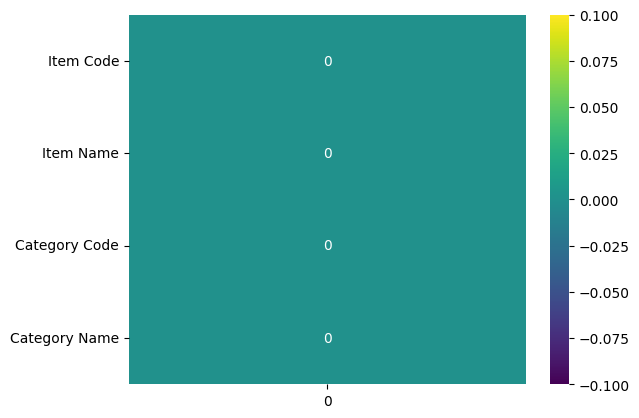

In [4]:
import seaborn as sns

sns.heatmap(df.isnull().sum().to_frame(), annot=True, cmap='viridis')

## Analyze variable distributions

### Subtask:
Use visualizations like `histplot`, `boxplot`, `pairplot`, and `countplot` to analyze the distributions of individual variables and relationships between pairs of variables.


**Reasoning**:
Create visualizations to analyze the distributions of individual variables.



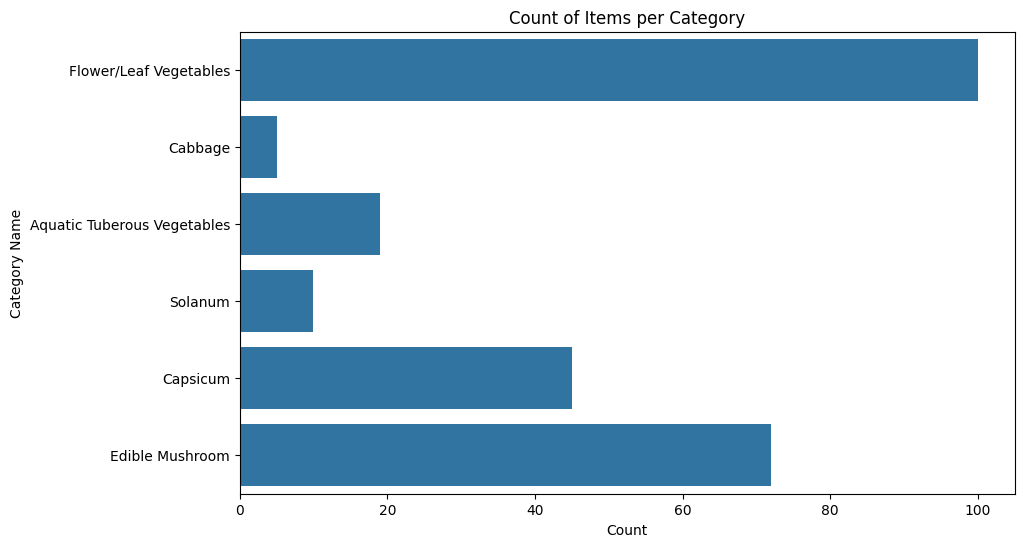

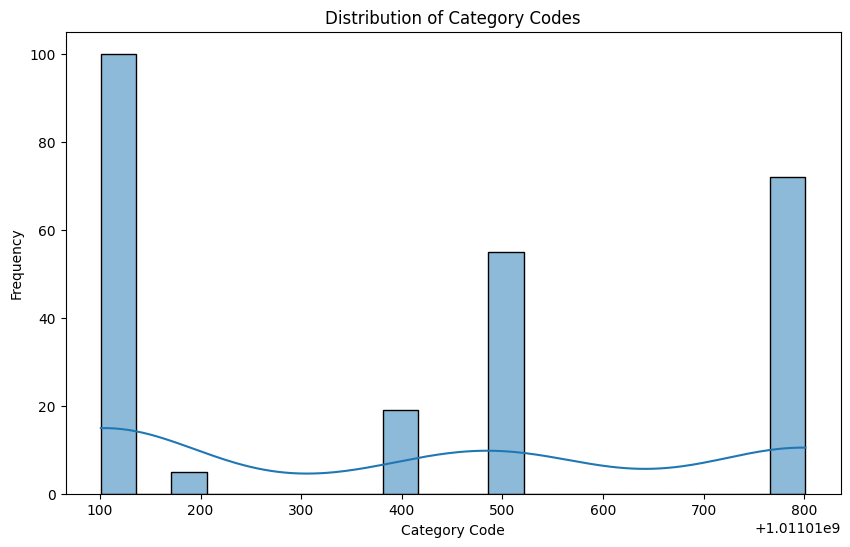

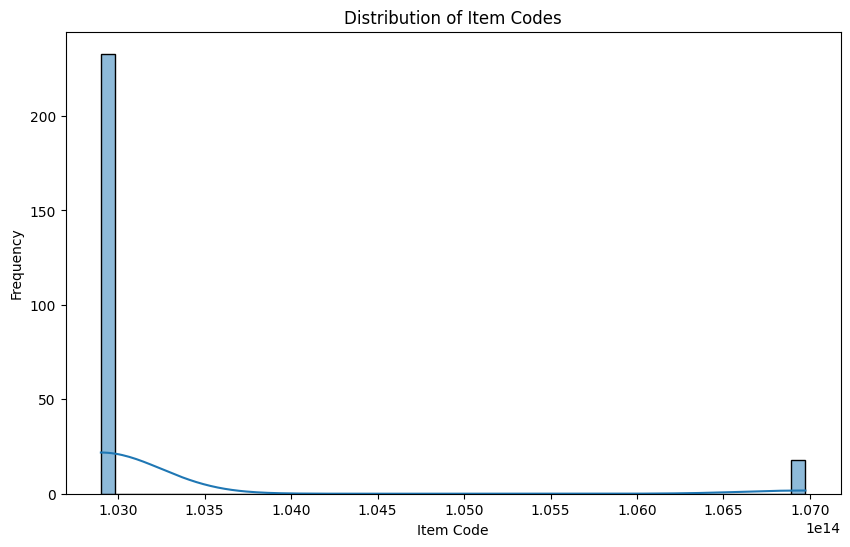

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Category Name')
plt.title('Count of Items per Category')
plt.xlabel('Count')
plt.ylabel('Category Name')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Category Code', bins=20, kde=True)
plt.title('Distribution of Category Codes')
plt.xlabel('Category Code')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Item Code', bins=50, kde=True)
plt.title('Distribution of Item Codes')
plt.xlabel('Item Code')
plt.ylabel('Frequency')
plt.show()

## Check variable relationships

### Subtask:
Create correlation heatmaps to visualize the relationships between numerical variables in the dataset.


**Reasoning**:
Select numerical columns, calculate the correlation matrix, and create a heatmap to visualize the correlations.



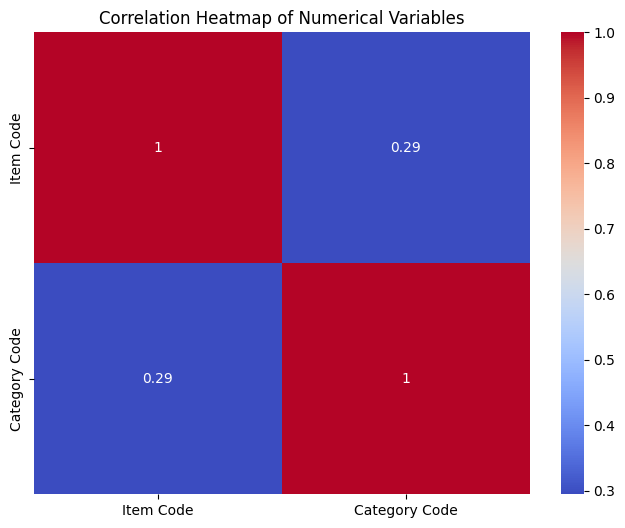

In [6]:
import matplotlib.pyplot as plt

numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## Perform grouping and aggregation

### Subtask:
Use `.groupby()` and aggregation functions to find patterns and insights at the category level.


**Reasoning**:
Group the DataFrame by 'Category Name' and calculate the count of items in each category, and then group by 'Category Name' and calculate descriptive statistics for numerical columns.



In [7]:
category_counts = df.groupby('Category Name').size().reset_index(name='Item Count')
display(category_counts)

numerical_df = df.select_dtypes(include=['number'])
category_numerical_stats = df.groupby('Category Name')[numerical_df.columns].agg(['count', 'mean', 'median'])
display(category_numerical_stats)

,Category Name,Item Count
0,Aquatic Tuberous Vegetables,19
1,Cabbage,5
2,Capsicum,45
3,Edible Mushroom,72
4,Flower/Leaf Vegetables,100
5,Solanum,10


Item Code                              \
                                count          mean        median   
Category Name                                                       
Aquatic Tuberous Vegetables        19  1.029000e+14  1.029000e+14   
Cabbage                             5  1.029000e+14  1.029000e+14   
Capsicum                           45  1.029000e+14  1.029000e+14   
Edible Mushroom                    72  1.038007e+14  1.029000e+14   
Flower/Leaf Vegetables            100  1.029815e+14  1.029000e+14   
Solanum                            10  1.029000e+14  1.029000e+14   

                            Category Code                              
                                    count          mean        median  
Category Name                                                          
Aquatic Tuberous Vegetables            19  1.011010e+09  1.011010e+09  
Cabbage                                 5  1.011010e+09  1.011010e+09  
Capsicum                               45  1.011011e+09  1.011011e+09  
Edible Mushroom                        72  1.011011e+09  1.011011e+09  
Flower/Leaf Vegetables                100  1.011010e+09  1.011010e+09  
Solanum                                10  1.011011e+09  1.011011e+09

## Analyze outliers and skewness

### Subtask:
Analyze numerical variables for outliers and skewness using `.skew()` and consider applying log transformations if necessary to handle skewed distributions.


**Reasoning**:
Select the numerical columns, calculate their skewness, and print the results.



In [8]:
numerical_cols = df.select_dtypes(include=['number']).columns
skewness = df[numerical_cols].skew()
print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
Item Code        3.339977
Category Code    0.170723
dtype: float64


**Reasoning**:
Based on the skewness values, identify significantly skewed variables and discuss the potential for log transformation without implementing it.



In [9]:
print("\nAnalysis of Skewness:")
if abs(skewness['Item Code']) > 1:
    print(f"Item Code is significantly skewed (Skewness: {skewness['Item Code']:.4f}).")
    print("A log transformation could be considered to reduce the skewness and make the distribution more normal-like, which can be beneficial for certain statistical models.")
else:
    print(f"Item Code is not significantly skewed (Skewness: {skewness['Item Code']:.4f}).")

if abs(skewness['Category Code']) > 1:
    print(f"Category Code is significantly skewed (Skewness: {skewness['Category Code']:.4f}).")
    print("A log transformation could be considered to reduce the skewness and make the distribution more normal-like, which can be beneficial for certain statistical models.")
else:
    print(f"Category Code is not significantly skewed (Skewness: {skewness['Category Code']:.4f}).")


Analysis of Skewness:
Item Code is significantly skewed (Skewness: 3.3400).
A log transformation could be considered to reduce the skewness and make the distribution more normal-like, which can be beneficial for certain statistical models.
Category Code is not significantly skewed (Skewness: 0.1707).


## Summary:

### Data Analysis Key Findings

*   The dataset contains 251 entries and 4 columns: 'Item Code', 'Item Name', 'Category Code', and 'Category Name'.
*   There are no missing values in the dataset.
*   'Item Name' has 247 unique values, while 'Category Name' has only 6 unique values.
*   The 'Category Name' distribution is dominated by 'Flower/Leaf Vegetables' (100 entries), followed by 'Edible Mushroom' (72 entries) and 'Capsicum' (45 entries).
*   The correlation between 'Item Code' and 'Category Code' is weak (approximately 0.30).
*   Grouping by 'Category Name' shows the distribution of items across categories, with 'Flower/Leaf Vegetables' having the highest count (100) and 'Cabbage' the lowest (5).
*   The 'Item Code' is significantly skewed (skewness $\approx$ 3.34), while 'Category Code' is not significantly skewed (skewness $\approx$ 0.17).

### Insights or Next Steps

*   The significant skewness in 'Item Code' suggests a non-uniform distribution of item identifiers, potentially indicating a specific numbering scheme or grouping not immediately apparent. Further investigation into the structure of 'Item Code' within and across categories could be beneficial.
*   Given the significant skewness of 'Item Code', considering a log transformation might be useful if this variable is to be used in statistical models that assume normality.


**Reasoning**:
Select numerical columns, calculate the correlation matrix, and create a heatmap to visualize the correlations.

**Reasoning**:
Group the DataFrame by 'Category Name' and calculate the count of items in each category, and then group by 'Category Name' and calculate descriptive statistics for numerical columns.